In [1]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

import numpy as np
import pandas as pd
from pathlib import Path

import ast
import umap.umap_ as umap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load dataset

data_dir = Path(r"C:\Users\Hyemi\Python\TopicModeling\Data")
data_dir.mkdir(parents=True, exist_ok=True) 

embedding_files = [
    "articles_embedding_1_full.csv",
    "articles_embedding_2_full.csv",
    "articles_embedding_3_full.csv",
    "articles_embedding_4_full.csv"
]

embedding_file_paths = [data_dir / file for file in embedding_files]


embedding_dfs = []
for file_path in embedding_file_paths:
    if file_path.exists():  # Check if the file exists before reading
        embedding_dfs.append(pd.read_csv(file_path))

df1 = embedding_dfs[0]
df2 = embedding_dfs[1]
df3 = embedding_dfs[2]
df4 = embedding_dfs[3]

## 0. Clustering Settings

In [3]:
# Load your embeddings data & Normalize embeddings
scaler = StandardScaler()

# Group1
df1["Embeddings"] = df1["Embeddings"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
embeddings_matrix1 = np.vstack(df1["Embeddings"].values)
embeddings_scaled1 = scaler.fit_transform(embeddings_matrix1)
df1["Embeddings_S"] = [embeddings_scaled1[i] for i in range(embeddings_scaled1.shape[0])]


# Group2
df2["Embeddings"] = df2["Embeddings"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
embeddings_matrix2 = np.vstack(df2["Embeddings"].values)
embeddings_scaled2 = scaler.fit_transform(embeddings_matrix2)
df2["Embeddings_S"] = [embeddings_scaled2[i] for i in range(embeddings_scaled2.shape[0])]


# Group3
df3["Embeddings"] = df3["Embeddings"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
embeddings_matrix3 = np.vstack(df3["Embeddings"].values)
embeddings_scaled3 = scaler.fit_transform(embeddings_matrix3)
df3["Embeddings_S"] = [embeddings_scaled3[i] for i in range(embeddings_scaled3.shape[0])]


# Group4
df4["Embeddings"] = df4["Embeddings"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
embeddings_matrix4 = np.vstack(df4["Embeddings"].values)
embeddings_scaled4 = scaler.fit_transform(embeddings_matrix4)
df4["Embeddings_S"] = [embeddings_scaled4[i] for i in range(embeddings_scaled4.shape[0])]

In [4]:
# UMAP Dimensionality Reduction to 3D
umap_3d = umap.UMAP(n_components=3, n_neighbors=30, min_dist=0.1, metric='cosine', random_state=42)

# Operate by group
embedding1_3d = umap_3d.fit_transform(embeddings_scaled1)
embedding2_3d = umap_3d.fit_transform(embeddings_scaled2)
embedding3_3d = umap_3d.fit_transform(embeddings_scaled3)
embedding4_3d = umap_3d.fit_transform(embeddings_scaled4)

C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarn

In [5]:
###' ################################################################################
###'
###' Elbow Function
###'
###'

# Function to calculate the Within-Cluster Sum of Squares (WCSS) for different cluster sizes
def plot_elbow_method(embeddings_matrix, max_clusters=9):
    wcss = []  # List to store WCSS for each number of clusters
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
        kmeans.fit(embeddings_matrix)
        wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid
    
    # Plot Elbow Graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
    plt.title("Elbow Method for Optimal k")
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.show()

## Group1. Spectral Clustering

C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

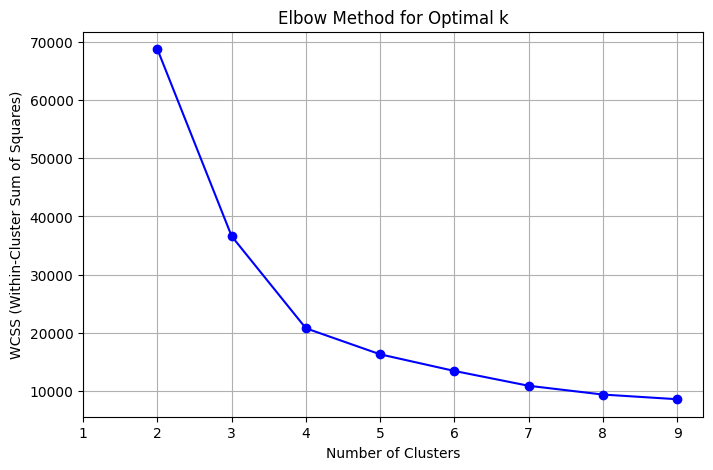

In [6]:
plot_elbow_method(embedding1_3d)

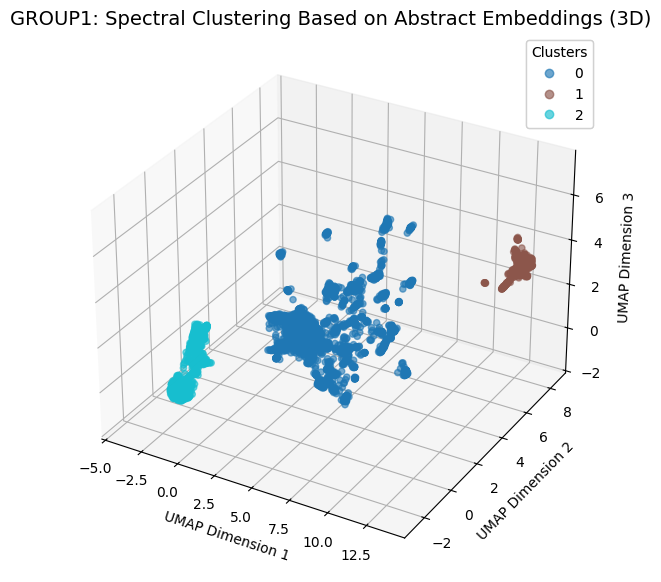

In [48]:
###' ################################################################################
###'
###' Visualization 1
###'
###'

num_clusters = 3  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.1, assign_labels='kmeans', random_state=42)
labels1 = spectral.fit_predict(embedding1_3d)

# Assign clusters to dataframe
#df1["Cluster"] = labels1

# Define colormap (matching KMeans style)
cmap = plt.get_cmap("tab10")

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with better aesthetics
scatter = ax.scatter(
    embedding1_3d[:, 0], embedding1_3d[:, 1], embedding1_3d[:, 2], 
    c=labels1, cmap=cmap, alpha=0.6, s=20
)

# Labels and Title
ax.set_title("GROUP1: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show plot
plt.show()

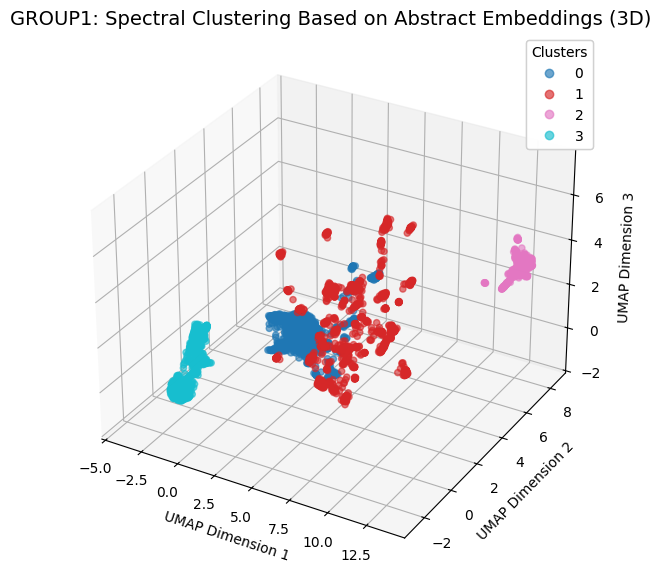

In [30]:
###' ################################################################################
###'
###' Visualization 2
###'
###'

num_clusters = 4  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.1, assign_labels='kmeans', random_state=42)
labels1 = spectral.fit_predict(embedding1_3d)

# Assign clusters to dataframe
#df1["Cluster"] = labels1

# Define colormap (matching KMeans style)
cmap = plt.get_cmap("tab10")

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with better aesthetics
scatter = ax.scatter(
    embedding1_3d[:, 0], embedding1_3d[:, 1], embedding1_3d[:, 2], 
    c=labels1, cmap=cmap, alpha=0.6, s=20
)

# Labels and Title
ax.set_title("GROUP1: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show plot
plt.show()

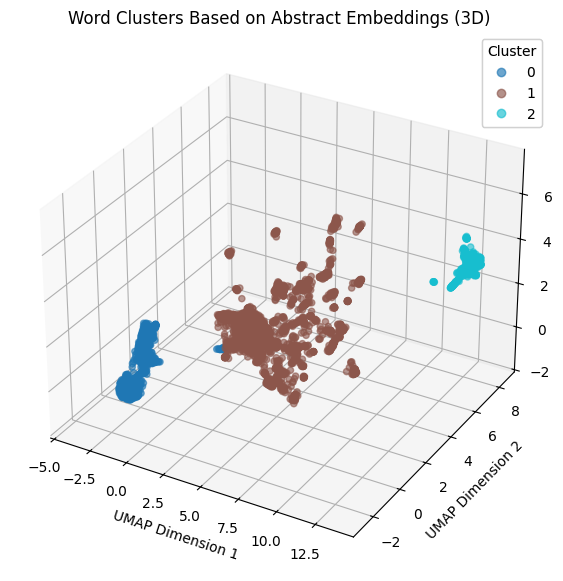

In [15]:
###' ################################################################################
###'
###' Special Trial1
###' : K-means
###'
###'


# Set number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=100)
clusters = kmeans.fit_predict(embedding1_3d)  # Use 3D embeddings

#df["Cluster"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding1_3d[:, 0], embedding1_3d[:, 1], embedding1_3d[:, 2], 
    c=clusters, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

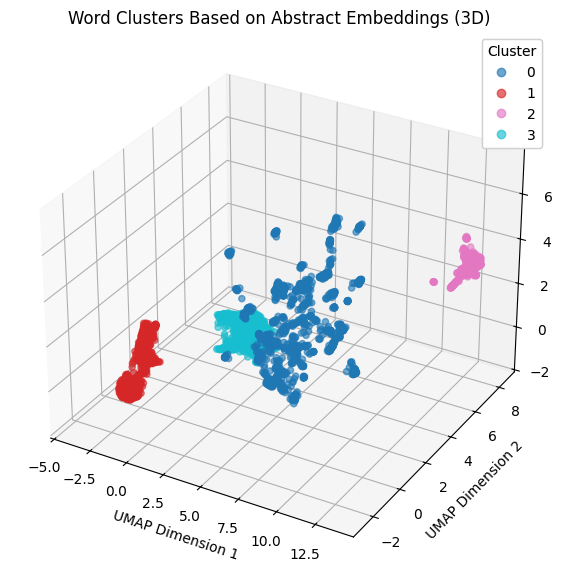

In [57]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering
spectral_embedding = spectral.affinity_matrix_  # You can use the spectral embedding as input

num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1 = agg_clustering.fit_predict(embedding1_3d)

#df["Cluster"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding1_3d[:, 0], embedding1_3d[:, 1], embedding1_3d[:, 2], 
    c=labels_1, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group2. Spectral Clustering

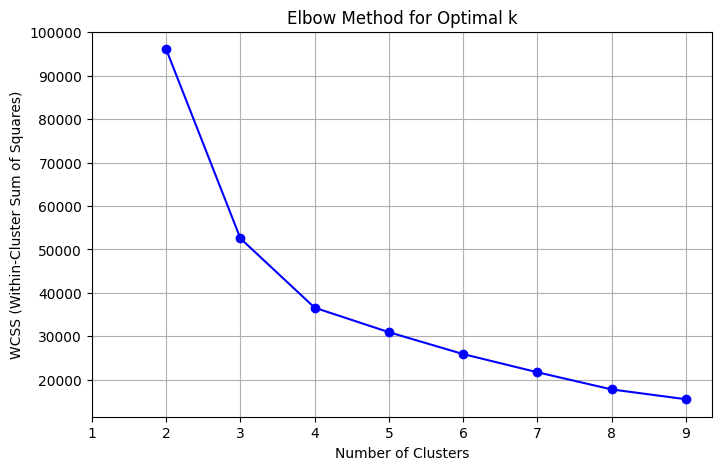

In [7]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding2_3d)

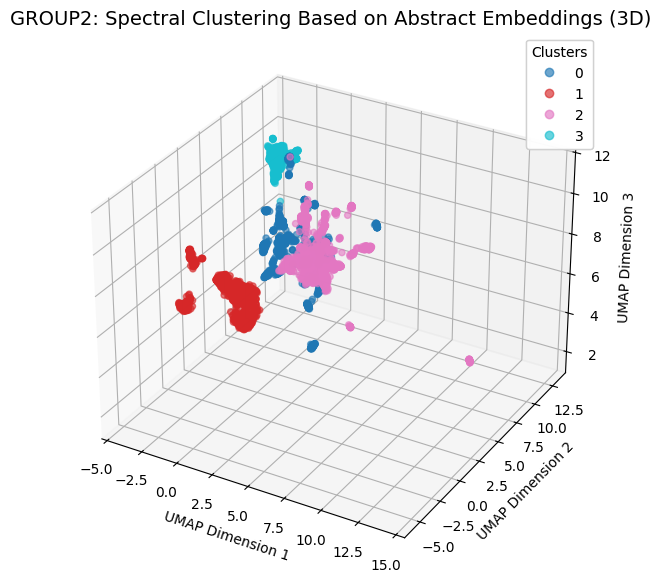

In [53]:
# Perform Spectral Clustering
num_clusters = 4  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)
labels2 = spectral.fit_predict(embedding2_3d)

# Assign clusters to dataframe
#df2["Cluster"] = labels2

# Define colormap (matching KMeans style)
cmap = plt.get_cmap("tab10")

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with better aesthetics
scatter = ax.scatter(
    embedding2_3d[:, 0], embedding2_3d[:, 1], embedding2_3d[:, 2], 
    c=labels2, cmap=cmap, alpha=0.6, s=20
)

# Labels and Title
ax.set_title("GROUP2: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend2 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend2)

# Show plot
plt.show()

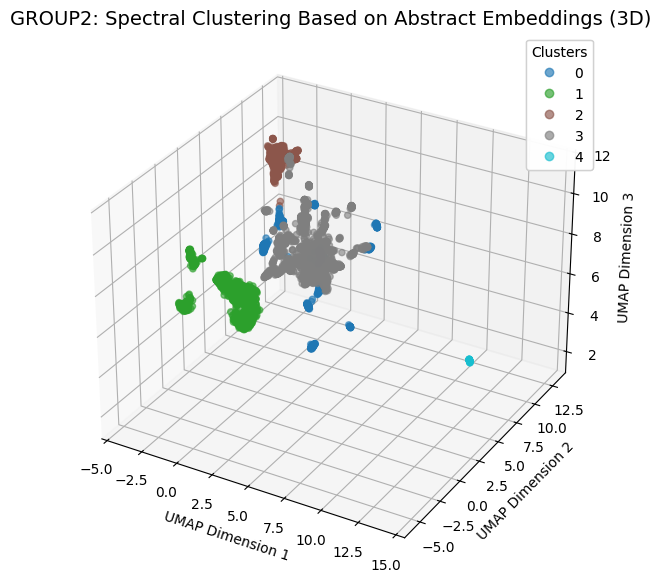

In [54]:
# Perform Spectral Clustering
num_clusters = 5  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)
labels2 = spectral.fit_predict(embedding2_3d)

# Assign clusters to dataframe
#df2["Cluster"] = labels2

# Define colormap (matching KMeans style)
cmap = plt.get_cmap("tab10")

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with better aesthetics
scatter = ax.scatter(
    embedding2_3d[:, 0], embedding2_3d[:, 1], embedding2_3d[:, 2], 
    c=labels2, cmap=cmap, alpha=0.6, s=20
)

# Labels and Title
ax.set_title("GROUP2: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend2 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend2)

# Show plot
plt.show()

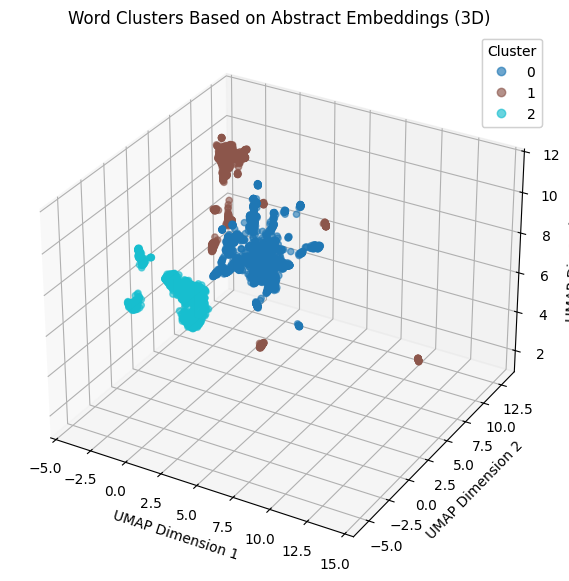

In [68]:
###' ################################################################################
###'
###' Special Trial3
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering
spectral_embedding = spectral.affinity_matrix_  # You can use the spectral embedding as input

num_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_2 = agg_clustering.fit_predict(spectral_embedding)

#df["Cluster"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding2_3d[:, 0], embedding2_3d[:, 1], embedding2_3d[:, 2], 
    c=labels_1_2, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

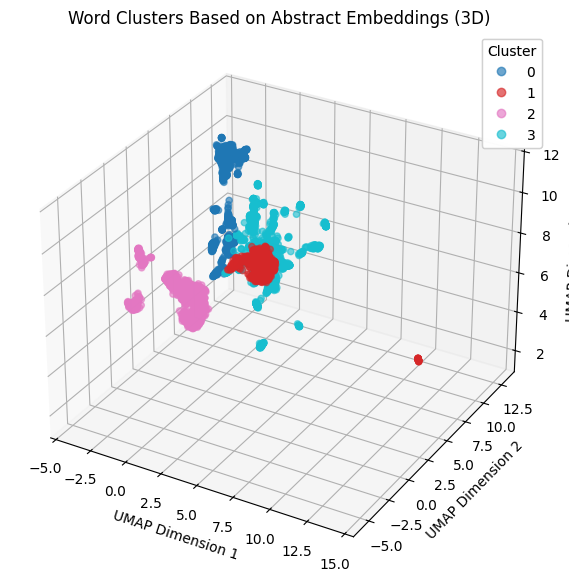

In [73]:
###' ################################################################################
###'
###' Special Trial3
###' : DBSCANClustering
###'
###'

from sklearn.mixture import GaussianMixture

num_clusters = 4
gmm = GaussianMixture(n_components=num_clusters)
labels_3_2 = gmm.fit_predict(embedding2_3d)


# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding2_3d[:, 0], embedding2_3d[:, 1], embedding2_3d[:, 2], 
    c=labels_3_2, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group3. Spectral Clustering

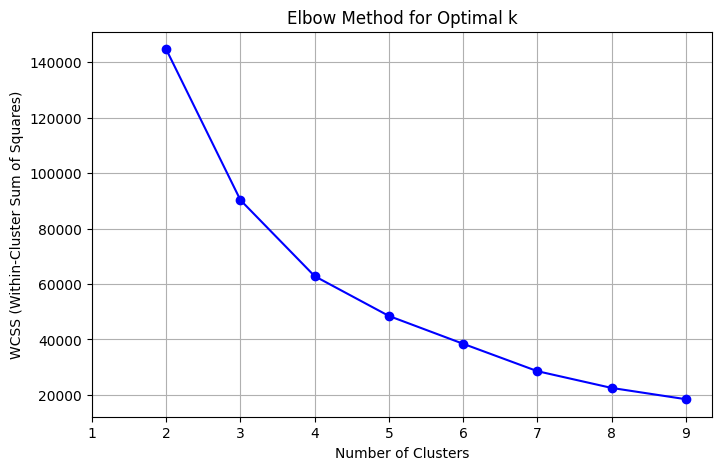

In [8]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding3_3d)

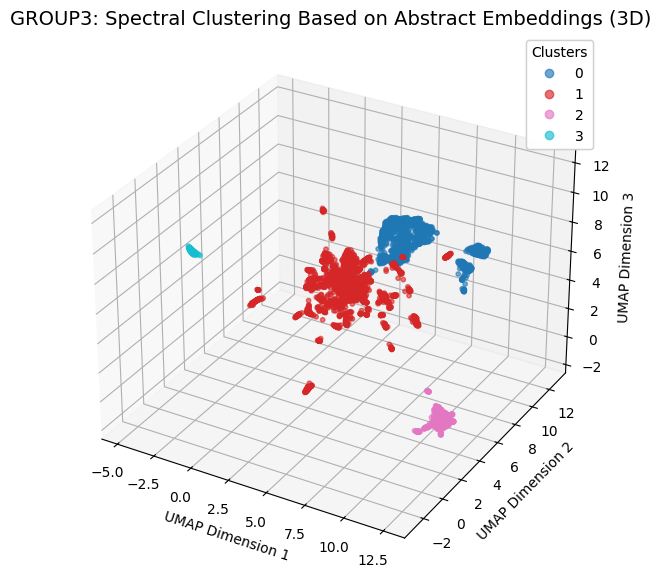

In [28]:
# Perform Spectral Clustering
num_clusters = 4  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)
labels3 = spectral.fit_predict(embedding3_3d)

#df["Cluster"] = labels

# Define custom colors for each cluster
cmap = plt.get_cmap("tab10")

# Visualize the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding3_3d[:, 0], embedding3_3d[:, 1], embedding3_3d[:, 2], 
    c=labels3, cmap=cmap, s=10, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP3: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend3 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend3)

# Show plot
plt.show()

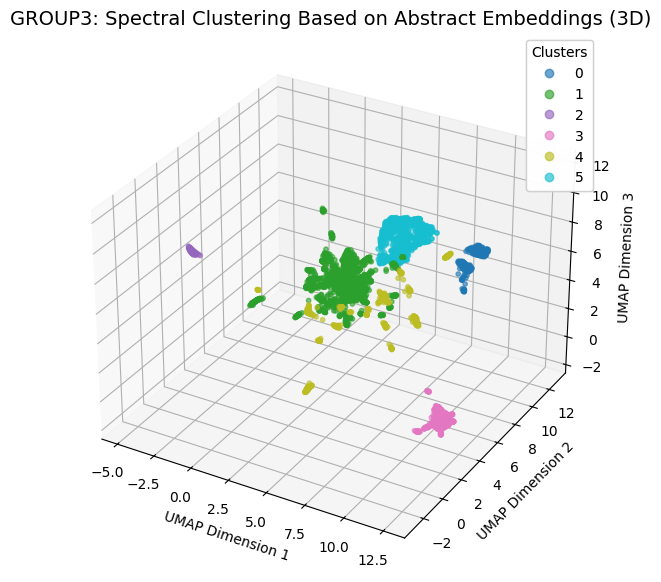

In [42]:
# Perform Spectral Clustering
num_clusters = 6  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.05, assign_labels='kmeans', random_state=42)
labels3 = spectral.fit_predict(embedding3_3d)

#df["Cluster"] = labels

# Define custom colors for each cluster
cmap = plt.get_cmap("tab10")

# Visualize the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding3_3d[:, 0], embedding3_3d[:, 1], embedding3_3d[:, 2], 
    c=labels3, cmap=cmap, s=10, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP3: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend3 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend3)

# Show plot
plt.show()

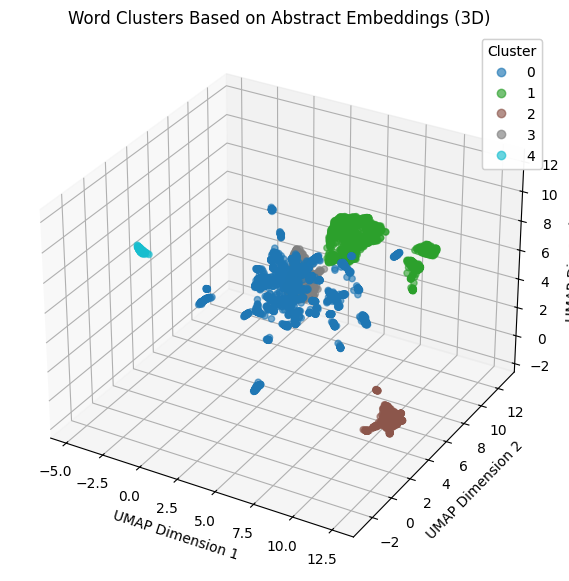

In [65]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering
spectral_embedding = spectral.affinity_matrix_  # You can use the spectral embedding as input

num_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_3 = agg_clustering.fit_predict(embedding3_3d)

#df["Cluster"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding3_3d[:, 0], embedding3_3d[:, 1], embedding3_3d[:, 2], 
    c=labels_1_3, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group4. Spectral Clustering

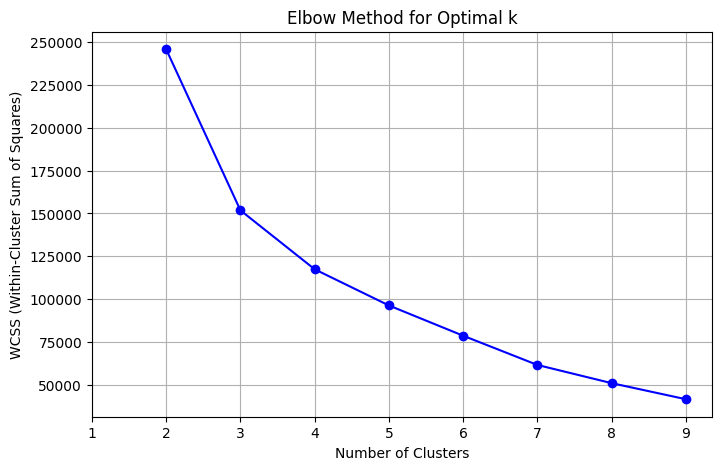

In [10]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding4_3d)

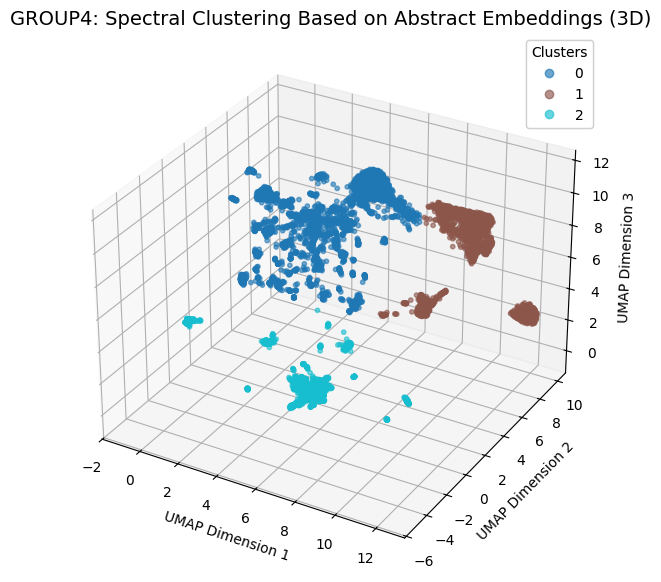

In [26]:
# Perform Spectral Clustering
num_clusters = 3  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)
labels4 = spectral.fit_predict(embedding4_3d)

#df["Cluster"] = labels

# Define custom colors for each cluster
cmap = plt.get_cmap("tab10")

# Visualize the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding4_3d[:, 0], embedding4_3d[:, 1], embedding4_3d[:, 2], 
    c=labels4, cmap=cmap, s=10, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP4: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend4 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend4)

# Show plot
plt.show()

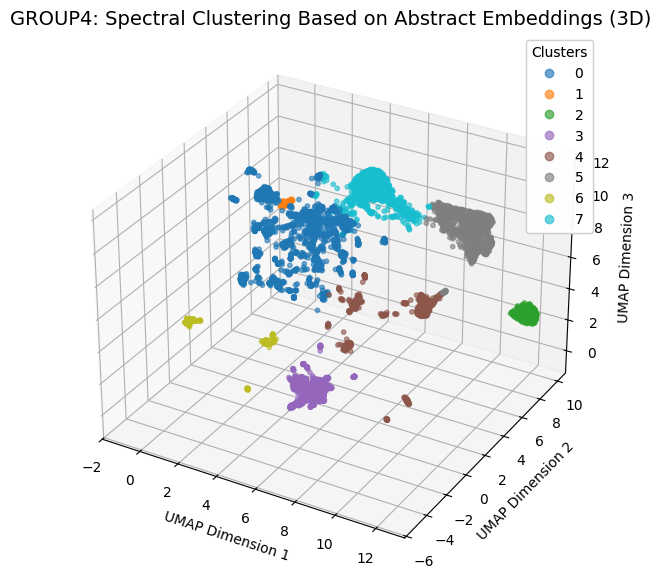

In [46]:
# Perform Spectral Clustering
num_clusters = 8  # Adjust as needed
spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.05, assign_labels='kmeans', random_state=42)
labels4 = spectral.fit_predict(embedding4_3d)

#df["Cluster"] = labels

# Define custom colors for each cluster
cmap = plt.get_cmap("tab10")

# Visualize the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    embedding4_3d[:, 0], embedding4_3d[:, 1], embedding4_3d[:, 2], 
    c=labels4, cmap=cmap, s=10, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP4: Spectral Clustering Based on Abstract Embeddings (3D)", fontsize=14)
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend (formatted for clarity)
legend4 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend4)

# Show plot
plt.show()

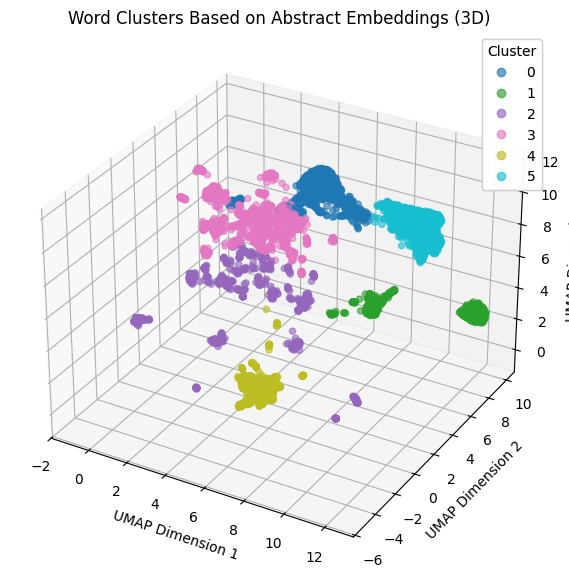

In [67]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering
spectral_embedding = spectral.affinity_matrix_  # You can use the spectral embedding as input

num_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_4 = agg_clustering.fit_predict(embedding4_3d)

#df["Cluster"] = clusters

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding4_3d[:, 0], embedding4_3d[:, 1], embedding4_3d[:, 2], 
    c=labels_1_4, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("Word Clusters Based on Abstract Embeddings (3D)")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

In [ ]:
###' ################################################################################
###'
###' Saving
###'
###'

file_path1 = data_dir / "articles_4_clustering1.csv"
df1.to_csv(file_path1, index=False)

file_path2 = data_dir / "articles_4_clustering2.csv"
df2.to_csv(file_path2, index=False)

file_path3 = data_dir / "articles_4_clustering3.csv"
df3.to_csv(file_path3, index=False)

file_path4 = data_dir / "articles_4_clustering4.csv"
df4.to_csv(file_path4, index=False)

In [ ]:
###' In CONCLUSION
###' OVERALL: SpectralClustering(assign_labels='k-mean') > SpectralClustering(assign_labels='discretize') > KmeansClustering
###' try Agglomerative Clustering // DBSCAN // Gaussian Mixture Models (GMM) // Custom Clustering

###' WithIn SpectralClustering(assign_labels='k-mean')
###' GROUP1   gamma=0.1
#num_clusters = 3 OR 4  # Adjust as needed
#spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.1, assign_labels='kmeans', random_state=42)

###' GROUP2
#num_clusters = 5  # Adjust as needed
#spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)


###' GROUP3 
#num_clusters = 6  # Adjust as needed
#spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.05, assign_labels='kmeans', random_state=42)

#num_clusters = 4  # Adjust as needed
#spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.01, assign_labels='kmeans', random_state=42)


###' GROUP4
#num_clusters = 8  # Adjust as needed
#spectral = SpectralClustering(n_clusters=num_clusters, affinity='rbf', gamma=0.05, assign_labels='kmeans', random_state=42)